### CITS4404 Practical Project

# Camo Worms - Evolutionary Algorithm

In [7]:
# imports
from camo_worms_utils import *
from random import shuffle

In [13]:
def get_cost(clew: list[Camo_Worm], worm_idx: int, w_internal: float=1.0, w_group: float=1.0):
    worm = clew[worm_idx]
    # ********************
    # internal
    
    # lets just say we want worms to be around 5 px wide
    # scale so that 5px => low score, lower or higher width => high score
    ideal = 10
    dist_from_ideal = np.abs(worm.width - ideal)

    internal_score = dist_from_ideal

    # ********************
    # group

    # lets get avg dist to other worms
    # dists = []
    # for i in range(len(clew)):
    #     if i is not worm_idx:
    #         euclid_dist = np.linalg.norm(np.array((worm.x, worm.y))-np.array((clew[i].x, clew[i].y)))
    #         # print(f"Worm centre ({worm.x}, {worm.y})")
    #         # print(f"Other worm centre ({clew[i].x}, {clew[i].y})")
    #         # print(f"Dist: {euclid_dist}")
    #         dists.append(euclid_dist)
    # avg_dist = np.mean(dists)
    # inversed = 1/avg_dist

    group_score = 0
    # ********************
    # environment

    # we want worms to match mean colour underneath them
    

    # return total weighted
    return internal_score*w_internal + group_score*w_group*0

In [9]:
def get_fittest(clew: list[Camo_Worm], top_n: int):
    costs = [get_cost(clew, i) for i, worm in enumerate(clew)]
    sorted_clew = sorted(zip(clew, costs), key=lambda x: x[1])
    return [worm for worm,cost in sorted_clew[:top_n]]

In [10]:
def mutate_worm(worm: Camo_Worm):
    new_x = worm.x
    new_y = worm.y
    new_r = worm.r
    new_theta = worm.theta
    new_deviation_r = worm.dr
    new_deviation_gamma = worm.dgamma

    # just doing width and colour
    new_width = (worm.width + rng.uniform(-1,1))
    
    new_colour = (worm.colour + rng.uniform(-1,1))
    new_colour = max( new_colour, 0 )
    new_colour = min( new_colour, 1 )

    return Camo_Worm(new_x, new_y, new_r, new_theta, new_deviation_r, new_deviation_gamma, new_width, new_colour)

def get_next_clew(fittest: list[Camo_Worm], size: int):
    # we will keep the parents and add new worms to size
    new_clew=fittest

    # shuffle for randomness
    shuffle(fittest)
    i = 0
    while len(new_clew) < size:
        reference_worm = fittest[i]
        # mutate and add to clew
        new_worm=mutate_worm(reference_worm)
        new_clew.append(new_worm)

    return new_clew

In [21]:
def train(image, mu: int, lmbda: int, num_epochs: int=100):
    # using algorithm like https://thomasweise.github.io/aitoa/aitoa.pdf#page=114&zoom=100,94,226
    # EA no recombination
    # mu is number of parents
    # lambda is number of offspring
    # total clew = mu + lambda
    clew = initialise_clew(mu+lmbda, image.shape, (40, 30, 1))

    drawing = Drawing(image)
    drawing.add_worms(clew)
    drawing.show()

    for i in range(num_epochs+1):
        # get fittest mu worms
        fittest = get_fittest(clew, mu)
        # get next clew of size mu + lambda
        clew = get_next_clew(fittest.copy(), size=mu+lmbda)
        if i%20==0:
            print(60*"*")
            print(f"Epoch: {i}")
            print(f"Fittest {len(fittest)}")
            drawing = Drawing(image)
            drawing.add_worms(fittest)
            drawing.show()
            print("Next Clew")
            drawing = Drawing(image)
            drawing.add_worms(clew)
            drawing.show()
            print(f"Worm width: {clew[0].width}")

Image name (shape) (intensity max, min, mean, std)

original (240, 720) (210, 0, 49.3, 34.8)


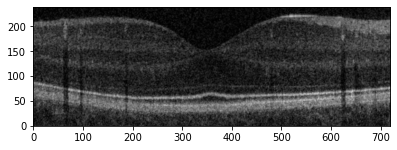

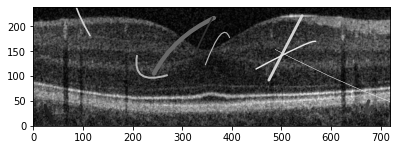

************************************************************
Epoch: 0
Fittest 3


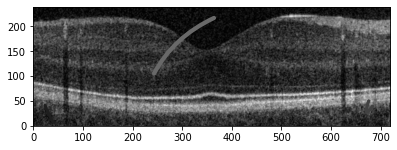

Next Clew


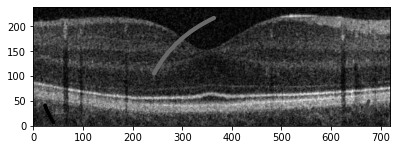

Worm width: 2.911013279085602
************************************************************
Epoch: 20
Fittest 3


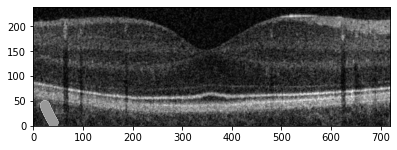

Next Clew


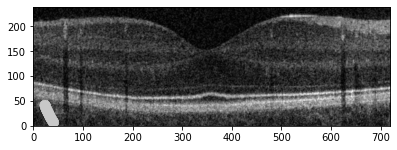

Worm width: 9.968162959196105
************************************************************
Epoch: 40
Fittest 3


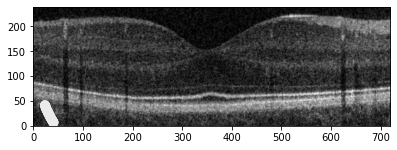

Next Clew


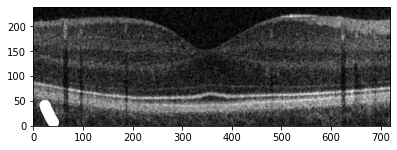

Worm width: 10.019645358715975
************************************************************
Epoch: 60
Fittest 3


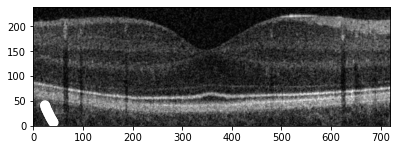

Next Clew


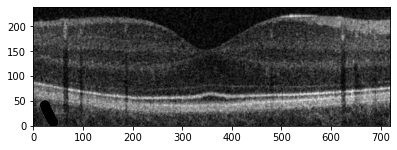

Worm width: 9.997646801260041
************************************************************
Epoch: 80
Fittest 3


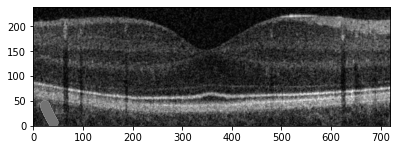

Next Clew


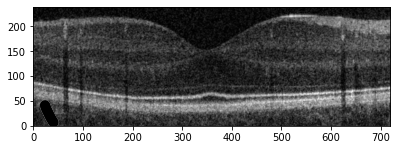

Worm width: 9.997646801260041
************************************************************
Epoch: 100
Fittest 3


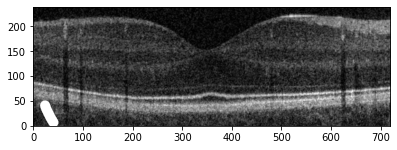

Next Clew


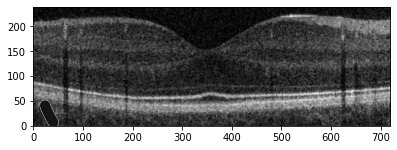

Worm width: 9.998599519882756


In [22]:
img = prep_image(IMAGE_DIR, IMAGE_NAME, MASK)
train(image=img, mu=3, lmbda=7)

Bruh